## Loading Data from local file

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./XYmat_lang.csv')

In [3]:
df.head(5)

,name,reviews,FPS,Gore,Action,Demons,Shooter,First-Person,Great Soundtrack,Multiplayer,...,Finnish,Norwegian,Swedish,Greek,Bulgarian,Romanian,Unnamed: 411,Vietnamese,Slovakian,number of languages
0,PLAYERUNKNOWN'S BATTLEGROUNDS,92,1,0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,17
1,BATTLETECH,49,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,4
2,DayZ,71,1,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,9
3,EVE Online,61,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4
4,Grand Theft Auto V: Premium Online Edition,74,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12


In [4]:
df.columns

Index(['name', 'reviews', 'FPS', 'Gore', 'Action', 'Demons', 'Shooter',
       'First-Person', 'Great Soundtrack', 'Multiplayer',
       ...
       'Finnish', 'Norwegian', 'Swedish', 'Greek', 'Bulgarian', 'Romanian',
       'Unnamed: 411', 'Vietnamese', 'Slovakian', 'number of languages'],
      dtype='object', length=415)

In [5]:
df.index

RangeIndex(start=0, stop=17371, step=1)

In [6]:
df.values

array([["PLAYERUNKNOWN'S BATTLEGROUNDS", 92, 1, ..., 0, 0, 17],
       ['BATTLETECH', 49, 0, ..., 0, 0, 4],
       ['DayZ', 71, 1, ..., 0, 0, 9],
       ...,
       ['Rivals of Aether: Summit Orcane', 90, 0, ..., 0, 0, 3],
       ['Space Cat', 70, 0, ..., 0, 0, 1],
       ['White Day - Horror Costume - Ji-Min Yoo', 28, 0, ..., 0, 0, 8]],
      dtype=object)

In [7]:
y = df['reviews'].values
array = df.to_numpy()
X = array[:, 2:]
print(X)

[[1 0 1 ... 0 0 17]
 [0 0 1 ... 0 0 4]
 [1 0 1 ... 0 0 9]
 ...
 [0 0 0 ... 0 0 3]
 [0 0 1 ... 0 0 1]
 [0 0 0 ... 0 0 8]]


## Split train test data

In [8]:
Xtrain = X[:12160]
Xtest = X[12160:]
ytrain = y[:12160]
ytest = y[12160:]
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

(12160, 413) (5211, 413) (12160,) (5211,)


## Test data with multiple linear regression

In [9]:
import scipy as sp
import scipy.sparse.linalg
import math

In [10]:
out = sp.sparse.linalg.lsqr(Xtrain,ytrain)
beta = out[0]
print(beta.shape)

(413,)


## Compute Baseline

In [23]:
yBaseline = np.ones(len(ytest)) * np.mean(ytrain)
errs = np.array(abs(ytest - yBaseline))
loss = np.sum(errs)
avgL = loss/len(ytest)
print("multiple variable loss="+"{:.5e}".format(avgL))

multiple variable loss=2.84827e+01


In [24]:
## Compute loss with linear regression

In [48]:
yp = Xtest@beta
errs = np.array(abs(ytest - yp))
loss = np.sum(errs)
avgL = np.mean(errs)

print("multiple variable loss="+"{:.5e}".format(avgL))
arr = []

for i in range(len(ytest)):
    arr.append(abs(yp[i]-ytest[i]))
arr.sort(reverse = True)
for i in range(50):
    print(arr[i])

multiple variable loss=2.84848e+01
85.5082307968776
85.50772847605961
84.7578314420628
83.998063419253
83.97293701324287
83.96156323405036
83.80197216395472
83.78139365461745
83.6484055315769
83.47397561328113
83.46433674203062
83.03885686341584
82.74476573921235
82.44742334636211
82.4048743081504
82.27703336724676
81.91238696983524
81.44534744783215
80.5504815420554
80.18786896527929
79.23062872447079
79.15701434899866
79.08262776478107
78.7173498138575
77.58542809740636
77.17519265642997
77.14380217436911
77.01754920473037
76.51942678684614
76.4682276096322
76.34318037767174
76.27174646780145
76.1336658684911
76.06843622017828
75.82555571798667
75.53520778505262
75.51031923101735
75.49167075520847
75.02891425083807
74.89089162545487
74.78919316094476
74.72455818516107
74.69741830743949
74.55860446506584
74.51538502708993
74.38907826485892
74.19588274498045
74.0644675759144
73.87086047552539
73.80046407353495


In [28]:
import matplotlib.pyplot as plt



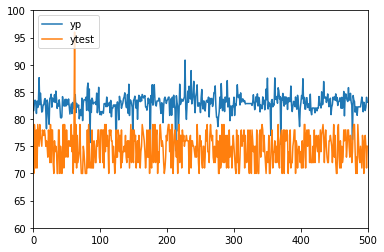

In [42]:
plt.plot(yp[:500], label = "yp")
plt.plot(ytest[:500], label = "ytest")
plt.legend(loc="upper left")
axes = plt.gca()
axes.set_xlim([0,500])
axes.set_ylim([60,100])
plt.show()

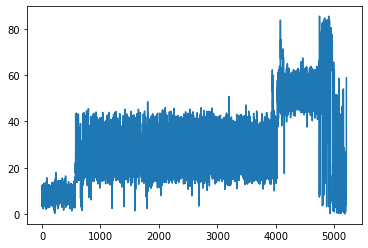

In [52]:
plt.plot(errs)

In [45]:
print(np.mean(errs))

28.484774925088566
